In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("C:\\Users\\seana\\Downloads\\SOAP Survey Data\\SOAP survey_December 12, 2023_06.14.csv")

**<h2><em>Data Cleanup</em></h2>**

In [3]:
#Dropping first and second rows, because they contain unnecessary information
raw_data.drop(0, inplace = True)
raw_data.drop(1, inplace = True)

#Drop respondents who identified themselves as non-binary, as sample size was too small
raw_data.drop(raw_data[raw_data["Q6.3"] == "Non-binary"].index, inplace = True)

#Dropping participants that say they do not currently attend university in the Netherlands
raw_data.loc[raw_data["Q1.3"]=="No"]
no_col = raw_data.loc[raw_data["Q1.3"]=="No"]
no_ind = no_col.index.values.tolist()
for i in no_ind:
    raw_data.drop(i, inplace = True)

#Dropping participants that did not complete the survey questions
raw_data.dropna(thresh = 14, inplace = True)

#Dropping columns that contain unnecessary information
raw_data.drop(columns = ["Q6.3_4_TEXT", "StartDate", "EndDate", "Status", "Progress", "Duration (in seconds)", "RecordedDate", "ResponseId", "DistributionChannel", "UserLanguage", "Finished"], inplace = True)

#Resetting indexes
raw_data.reset_index(drop = True, inplace = True)

#Creating backup copy of dataframe
raw_data_backup = raw_data.copy(deep = True)

raw_data

,Q1.2,Q1.3,Q2.1,Q2.2,Q2.3,Q2.4,Q3.1_1,Q3.1_2,Q3.1_3,Q3.1_4,Q4.1,Q4.2,Q4.3_1,Q4.3_2,Q4.3_3,Q5.1,Q5.2,Q6.1_1,Q6.2_1,Q6.3
0,Yes,Yes,Frequently,Yes,Very frequently,Yes,Neutral,Strongly Agree,Disagree,Neutral,Somewhat uncomfortable,Neutral,Agree,Neutral,Agree,Neutral,Unsure,2005,German,Female
1,Yes,Yes,Very frequently,Yes,Frequently,Unsure,Neutral,Agree,Neutral,Agree,Somewhat uncomfortable,Somewhat Unlikely,Agree,Disagree,Disagree,Very unaware,Unsure,2003,Hungarian,Female
2,Yes,Yes,Frequently,Yes,Occasionally,Unsure,Disagree,Neutral,Disagree,Neutral,Neutral,Somewhat Unlikely,Agree,Neutral,Neutral,Very unaware,Unsure,2003,New Zealander,Female
3,Yes,Yes,Frequently,Yes,Occasionally,Unsure,Disagree,Disagree,Strongly Disagree,Strongly Disagree,Somewhat uncomfortable,Neutral,Neutral,Agree,Disagree,Unaware,Yes,2004,Vietnamese,Female
4,Yes,Yes,Frequently,Yes,Frequently,Yes,Disagree,Neutral,Agree,Agree,Somewhat uncomfortable,Somewhat Unlikely,Strongly Agree,Disagree,Agree,Very unaware,Unsure,1999,Portuguese,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Yes,Yes,Occasionally,Yes,Frequently,Unsure,Disagree,Agree,Disagree,Disagree,Somewhat uncomfortable,Very Likely,Strongly Agree,Disagree,Agree,Neutral,Unsure,1999,Turkish,Female
93,Yes,Yes,Very frequently,Yes,Very frequently,Yes,Agree,Agree,Strongly Disagree,Agree,Extremely uncomfortable,Very Likely,Strongly Agree,Strongly Agree,Strongly Disagree,Very unaware,Yes,2002,Dutch,Female
94,Yes,Yes,Frequently,No,NaN,Unsure,Agree,Strongly Disagree,Strongly Agree,Agree,Neutral,Neutral,Agree,Neutral,Agree,Very aware,Unsure,1997,Albanian,Female
95,Yes,Yes,Occasionally,Yes,Occasionally,No,Disagree,Disagree,Disagree,Disagree,Extremely comfortable,Somewhat Likely,Agree,Neutral,Disagree,Aware,Yes,2004,Filipino,Female


**<h2><em>Creating Variables</em></h2>**

In [4]:
### Awareness: Q2.1 - Q2.4

# 2.1: How frequently do you think individuals are being recorded in public without their consent?
# 2.2: Have you ever encountered a post on social media featuring an individual being recorded without their consent?
# 2.3: How often do you encounter posts featuring an individual being recorded without their consent?
# 2.4: Has anyone ever recorded you in public without your consent?

# disregard respondents who have not seen type of content before
# 1 represents negative answer to question, 5 represents positive answer to question

# 1 - 2.5: low personal experience
# 2.5 - 3.5: moderate personal experience
# 3.5 - 5: high personal experience

# creating variable dataframe and dropping rows with NA values
aware_1 = raw_data[["Q2.1", "Q2.3"]].dropna()

# replacing word answers with numerical values 
aware_1.replace(["Very frequently", "Frequently", "Occasionally", "Rarely", "Very rarely"], [5, 4, 3, 2, 1], inplace = True)

# creating new column finding the mean answer for each participant
aware_1["Awareness"] = (aware_1["Q2.1"] + aware_1["Q2.3"]) / 2

aware_1

,Q2.1,Q2.3,Awareness
0,4,5,4.5
1,5,4,4.5
2,4,3,3.5
3,4,3,3.5
4,4,4,4.0
...,...,...,...
91,4,3,3.5
92,3,4,3.5
93,5,5,5.0
95,3,3,3.0


In [5]:
### Dependent Variable: Behavioural consciousness Q4.1 - Q4.3

# 4.1: How comfortable are you when someone is recording other individuals in a public space?
# 4.2: How likely do you think it is that you will be recorded in public for your behavior?
# 4.3: To what extent do you agree or disagree with the following statements?
  # I am more conscious of my actions in public
  # I am afraid I will be recorded in public without my consent
  # I trust people to record me appropriately in public

# 1 - 2.5: low behavioural conciousness
# 2.5 - 3.5: moderate behavioural conciousness
# 3.5 - 5: high behavioural conciousness

# creating variable dataframe and dropping rows with NA values
behave_1 = raw_data[["Q4.1", "Q4.2", "Q4.3_1", "Q4.3_2", "Q4.3_3"]].dropna()

# replacing word answers with numerical values 
behave_1.replace(["Extremely uncomfortable", "Somewhat uncomfortable", "Neutral", "Somewhat comfortable", "Extremely comfortable"], [1, 2, 3, 4, 5], inplace = True)
behave_1.replace(["Very Likely", "Somewhat Likely", "Neutral", "Somewhat Unlikely", "Very Unlikely"], [1, 2, 3, 4, 5], inplace = True)
behave_1["Q4.3_1"].replace(["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"], [1, 2, 3, 4, 5], inplace = True)
behave_1["Q4.3_2"].replace(["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"], [1, 2, 3, 4, 5], inplace = True)
behave_1["Q4.3_3"].replace(["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"], [5, 4, 3, 2, 1], inplace = True)

# creating new "Mean" column finding the mean answer for each participant
behave_1["Behavioural consciousness"] = (behave_1["Q4.1"] + behave_1["Q4.2"] + behave_1["Q4.3_1"] + behave_1["Q4.3_2"] + behave_1["Q4.3_3"]) / 5

behave_1

,Q4.1,Q4.2,Q4.3_1,Q4.3_2,Q4.3_3,Behavioural consciousness
0,2,3,4,3,2,2.8
1,2,4,4,2,4,3.2
2,3,4,4,3,3,3.4
3,2,3,3,4,4,3.2
4,2,4,5,2,2,3.0
...,...,...,...,...,...,...
92,2,1,5,2,2,2.4
93,1,1,5,5,5,3.4
94,3,3,4,3,2,3.0
95,5,2,4,3,4,3.6


In [6]:
### Ethicality Q3.1_1 - Q3.1_4

# To what extent do you agree or disagree with the following statements:
  # It is ethical for individuals to record other individuals in public without their consent
  # I have considered recording another individual in public without their consent
  # Individuals who have recorded others in public without consent should be allowed to post these recordings on social media
  # Since an individual is in a public space, other individuals should be allowed to record their behaviour without their consent

# 1 - 2.5: Unethical
# 2.5 - 3.5: Neutral
# 3.5 - 5: Ethical

# creating variable dataframe and dropping rows with NA values
ethic_1 = raw_data[["Q3.1_1", "Q3.1_2", "Q3.1_3", "Q3.1_4"]].dropna()

# replacing word answers with numerical values
ethic_1.replace(["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"], [5, 4, 3, 2, 1], inplace = True)

# creating new "Mean" column finding the mean answer for each participant
ethic_1["Ethicality"] = (ethic_1["Q3.1_1"] + ethic_1["Q3.1_2"] + ethic_1["Q3.1_3"] + ethic_1["Q3.1_4"]) / 4

ethic_1

,Q3.1_1,Q3.1_2,Q3.1_3,Q3.1_4,Ethicality
0,3,1,4,3,2.75
1,3,2,3,2,2.50
2,4,3,4,3,3.50
3,4,4,5,5,4.50
4,4,3,2,2,2.75
...,...,...,...,...,...
92,4,2,4,4,3.50
93,2,2,5,2,2.75
94,2,5,1,2,2.50
95,4,4,4,4,4.00


In [7]:
regulation = raw_data["Q5.1"].to_frame().dropna()
regulation.rename(columns = {"Q5.1": "Regulation Awareness"}, inplace = True)
regulation.replace(["Very aware", "Aware", "Neutral", "Unaware", "Very unaware"], [5, 4, 3, 2, 1], inplace = True)

In [17]:
#Creating dataframe with all variable means and gender
master_table = pd.concat([aware_1["Awareness"], behave_1["Behavioural consciousness"], ethic_1["Ethicality"], regulation["Regulation Awareness"], raw_data["Q5.2"], raw_data["Q6.3"]], axis = 1).dropna()
#Renaming gender and regulation column
master_table.rename(columns = {"Q6.3": "Gender", "Q5.2": "Stronger Regulations"}, inplace = True)
master_table

,Awareness,Behavioural consciousness,Ethicality,Regulation Awareness,Stronger Regulations,Gender
0,4.5,2.8,2.75,3.0,Unsure,Female
1,4.5,3.2,2.50,1.0,Unsure,Female
2,3.5,3.4,3.50,1.0,Unsure,Female
3,3.5,3.2,4.50,2.0,Yes,Female
4,4.0,3.0,2.75,1.0,Unsure,Male
...,...,...,...,...,...,...
91,3.5,3.4,2.50,2.0,Unsure,Male
92,3.5,2.4,3.50,3.0,Unsure,Female
93,5.0,3.4,2.75,1.0,Yes,Female
95,3.0,3.6,4.00,4.0,Yes,Female


**<h2><em>Visualisations</em></h2>**

<Axes: xlabel='Awareness', ylabel='Behavioural consciousness'>

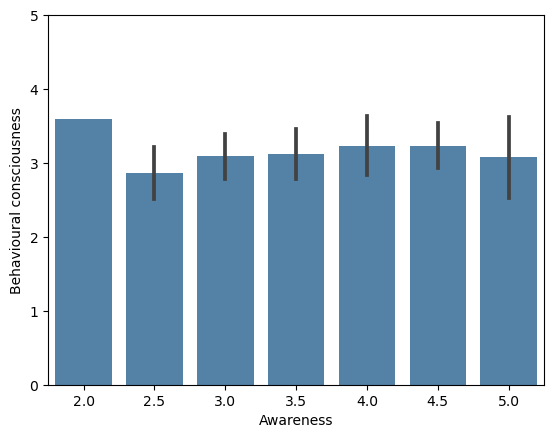

In [15]:
# creating seaborn barplot
behave_aware_1 = sns.barplot(data = master_table , x = "Awareness", y = "Behavioural consciousness", color = "steelblue", errorbar = "sd")

#extending y axis
behave_aware_1.set_ylim(0, 5)
behave_aware_1

<Axes: xlabel='Awareness', ylabel='Behavioural consciousness'>

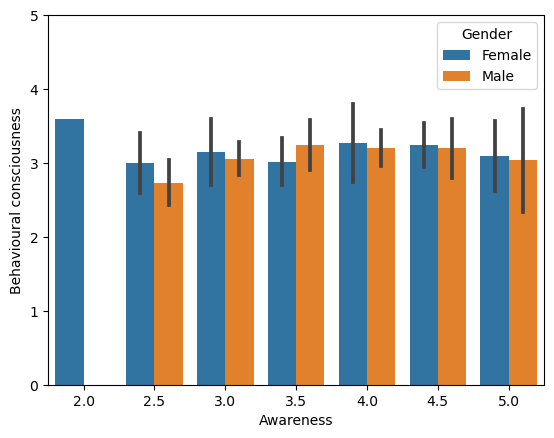

In [10]:
behave_aware_2 = sns.barplot(data = master_table , x = "Awareness", y = "Behavioural consciousness", hue = "Gender", errorbar = "sd")
behave_aware_2.set_ylim(0, 5)
behave_aware_2

(0.0, 5.0)

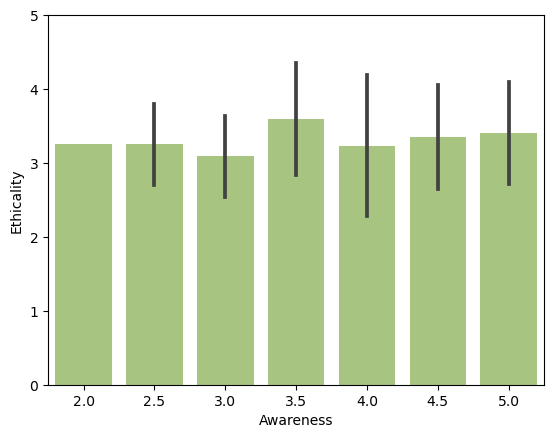

In [11]:
ethic_aware_1 = sns.barplot(data = master_table, x = "Awareness", y = "Ethicality", color = "#A9D174", errorbar = "sd")
ethic_aware_1.set_ylim(0, 5)

(0.0, 5.0)

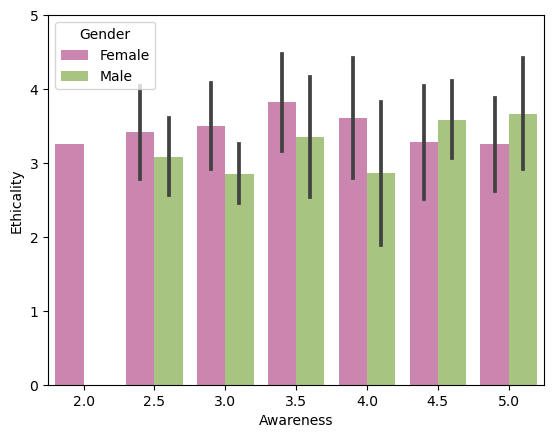

In [18]:
#creating a custom color palette
custom_palette = {"Male": "#A9D174", "Female": "#D67AB1"}

ethic_aware_2 = sns.barplot(data = master_table, x = "Awareness", y = "Ethicality", hue = "Gender", palette = custom_palette, errorbar = "sd")
ethic_aware_2.set_ylim(0, 5)

In [14]:
# creating a frequency table for demographic values
dem_freq = raw_data["Q6.3"].value_counts().to_frame()
dem_freq.rename(columns={"Q6.3": "Gender (Frequency)"}, inplace = True)
dem_freq["Gender (%)"] = raw_data["Q6.3"].value_counts(normalize = True).mul(100).round(1).astype(str) + "%"
dem_freq

,Gender (Frequency),Gender (%)
Female,49,54.4%
Male,41,45.6%


[Text(0.5, 1.0, 'Q2.2 - Have you ever encountered a post on social media featuring an individual being recorded without their consent?')]

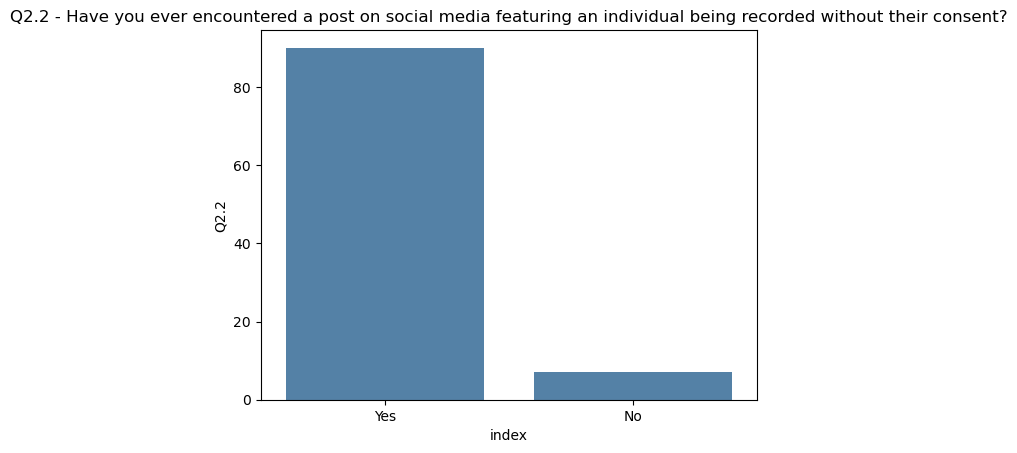

In [15]:
Q2_2frame = raw_data["Q2.2"].value_counts().to_frame().reset_index()
sns.barplot(data = Q2_2frame, y = "Q2.2", x = "index", color = "steelblue").set(title = "Q2.2 - Have you ever encountered a post on social media featuring an individual being recorded without their consent?")

[Text(0.5, 1.0, 'Q2.3 - How often do you encounter posts featuring an individual being recorded without their consent?')]

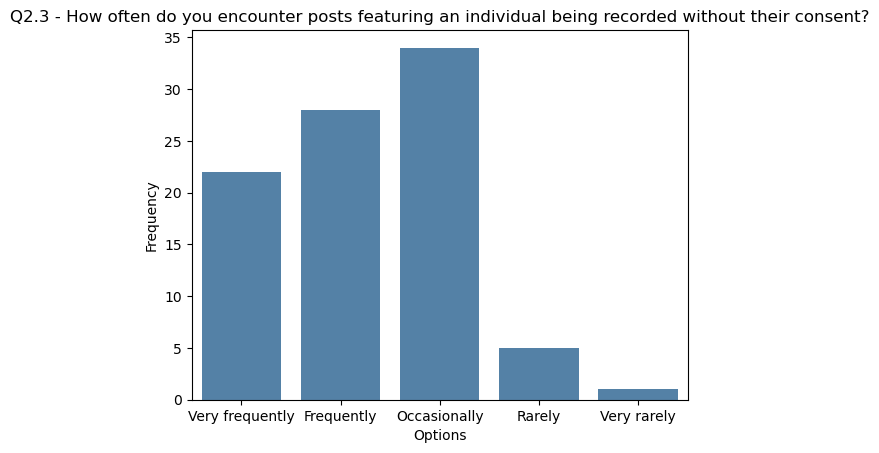

In [16]:
Q2_3frame = raw_data["Q2.3"].value_counts().to_frame().reset_index()
Q2_3frame.rename(columns = {"index": "Options", "Q2.3": "Frequency"}, inplace = True)
sns.barplot(data = Q2_3frame, y = "Frequency", x = "Options", color = "steelblue", order = ["Very frequently", "Frequently", "Occasionally", "Rarely", "Very rarely"]).set(title = "Q2.3 - How often do you encounter posts featuring an individual being recorded without their consent?")